# Import Libraries

In [1]:
import sklearn
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

c:\Anac_Pack\ML\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Data Preparation

Dataset diambil menggunakan API Visual Crossing. Data tersebar dalam beberapa CSV sehingga perlu digabung menjadi 1 buah dataset terlebih dahulu.

In [ ]:
letak = ''

In [2]:
jonggol1 = pd.read_csv('Kecamatan/Jonggol 23 September 2012 24 Februari 2015.csv')
jonggol2 = pd.read_csv('Kecamatan/Jonggol 25 Feb 2015 27 Juli 2017.csv')
jonggol3 = pd.read_csv('Kecamatan/Jonggol 28 Juli 2017 28 Desember 2019.csv')
jonggol4 = pd.read_csv('Kecamatan/Jonggol 29 Desember 2019 23 September 2022.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/Matthew/IPython/GEMASTIK15/Kecamatan/Jonggol 23 September 2012 24 Februari 2015.csv'

In [ ]:
df = pd.concat([jonggol1, jonggol2, jonggol3, jonggol4], axis = 0)

In [ ]:
df

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"-6.495660182,107.0462951",2012-09-23,32.8,23.0,28.1,37.0,23.0,30.6,22.6,73.1,...,25.9,10,NaN,2012-09-23T05:40:44,2012-09-23T17:47:39,0.28,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
1,"-6.495660182,107.0462951",2012-09-24,32.2,23.4,27.9,37.9,23.4,30.5,22.8,74.5,...,23.7,9,NaN,2012-09-24T05:40:13,2012-09-24T17:47:29,0.34,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
2,"-6.495660182,107.0462951",2012-09-25,32.8,22.6,27.7,38.0,22.6,30.1,21.9,71.0,...,21.7,9,NaN,2012-09-25T05:39:41,2012-09-25T17:47:19,0.39,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96749099999,..."
3,"-6.495660182,107.0462951",2012-09-26,32.0,22.5,27.4,37.9,22.5,29.6,22.0,72.6,...,19.9,9,NaN,2012-09-26T05:39:10,2012-09-26T17:47:09,0.43,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"96741099999,WIII,96739099999,WIHH,96749099999,..."
4,"-6.495660182,107.0462951",2012-09-27,33.3,22.3,27.3,36.8,22.3,29.0,21.5,71.7,...,21.8,9,NaN,2012-09-27T05:38:39,2012-09-27T17:46:59,0.46,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"96741099999,WIII,96739099999,WIHH,96749099999,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"-6.49566018240588, 107.04629514365",2022-09-19,33.0,22.4,27.0,38.1,22.4,28.9,22.7,78.6,...,20.7,10,30.0,2022-09-19T05:43:08,2022-09-19T17:48:29,0.83,"Rain, Partially cloudy",Partly cloudy throughout the day with late aft...,rain,"96741099999,WIII,96739099999,WIHH,96781099999,..."
996,"-6.49566018240588, 107.04629514365",2022-09-20,32.5,21.7,27.9,36.8,21.7,30.4,22.4,73.2,...,22.1,10,30.0,2022-09-20T05:42:36,2022-09-20T17:48:18,0.87,"Rain, Partially cloudy",Partly cloudy throughout the day with rain.,rain,"96741099999,WIII,96739099999,WIHH,96781099999,..."
997,"-6.49566018240588, 107.04629514365",2022-09-21,31.7,24.0,27.9,36.6,24.0,30.6,23.4,77.8,...,20.9,9,30.0,2022-09-21T05:42:04,2022-09-21T17:48:08,0.91,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"WIII,WIHH,remote"
998,"-6.49566018240588, 107.04629514365",2022-09-22,31.2,25.0,27.5,37.7,25.0,30.0,24.2,83.0,...,20.2,8,30.0,2022-09-22T05:41:32,2022-09-22T17:47:57,0.95,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"WIII,WIHH"


Penelitian bertujuan untuk meramalkan temperatur kedepannya, sehingga variabel yang diambil hanya variabel datetime dan temp.

In [ ]:
df = df[['datetime', 'temp']]

In [ ]:
df.head()

,datetime,temp
0,2012-09-23,28.1
1,2012-09-24,27.9
2,2012-09-25,27.7
3,2012-09-26,27.4
4,2012-09-27,27.3


Variabel datetime akan diubah menjadi bertipe datetime (sebelumnya string) dan dibuat menjadi indeks dari dataset.

In [ ]:
df['datetime'] = pd.to_datetime(df['datetime'])

In [ ]:
df

,datetime,temp
0,2012-09-23,28.1
1,2012-09-24,27.9
2,2012-09-25,27.7
3,2012-09-26,27.4
4,2012-09-27,27.3
...,...,...
995,2022-09-19,27.0
996,2022-09-20,27.9
997,2022-09-21,27.9
998,2022-09-22,27.5


In [ ]:
df.set_index(['datetime'],inplace=True)

In [ ]:
df.head()

,temp
datetime,
2012-09-23,28.1
2012-09-24,27.9
2012-09-25,27.7
2012-09-26,27.4
2012-09-27,27.3


Berikut adalah plot temperatur Kecamatan Jonggol, Kabupaten Bogor selama 10 tahun terakhir.

<AxesSubplot:xlabel='datetime', ylabel='temp'>

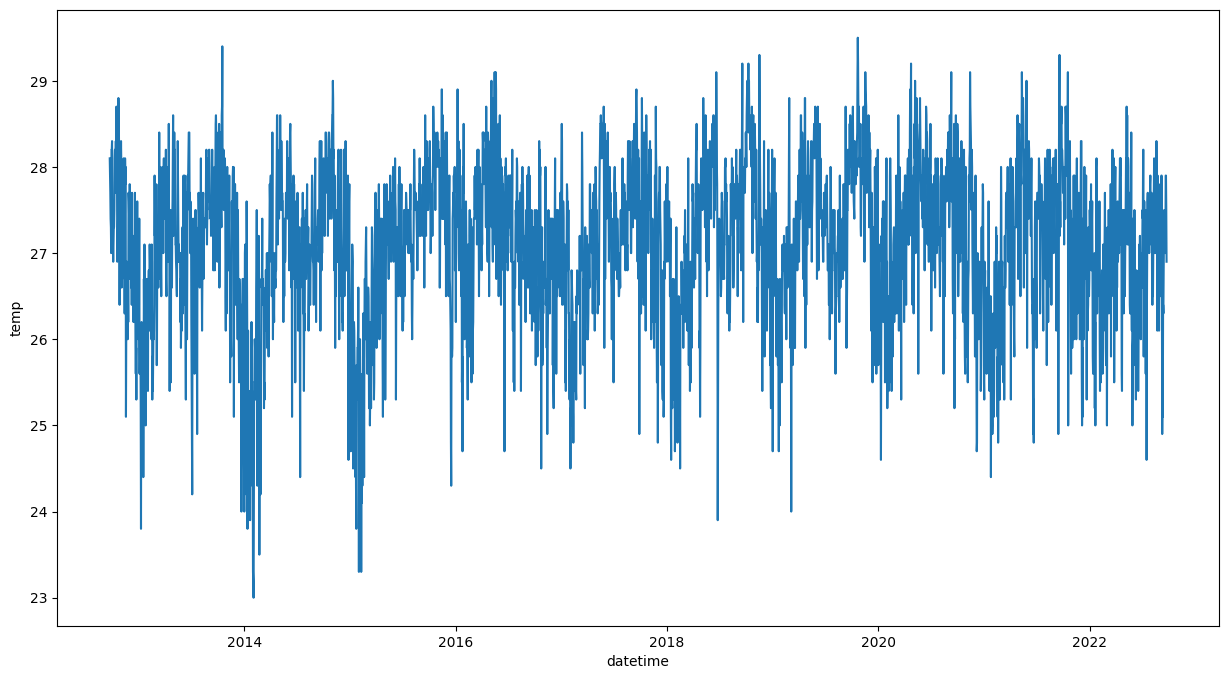

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x = 'datetime',y = 'temp')

# Data Preprocessing

Dataset dipisahkan menjadi data latih dan data uji, dengan proporsi 80% data latih dan 20% data uji. Data latih kemudian dipisahkan kembali menjadi data latih dan data validasi, sehingga proporsi keseluruhan data latih, data validasi dan data uji adlaah 40% : 40% : 20%.

In [ ]:
X_train = df[:1461]
X_val = df[1461:2922]
y = df[2922:]

## Normalization

Normalisasi dilakukan terhadap data latih, kemudian parameter yang ada pada data latih digunakan untuk normalisasi data validasi dan data uji. Hal ini dilakukan untuk menghindari data leakage yang terjadi secara tidak langsung.

Sumber : https://machinelearningmastery.com/data-preparation-without-data-leakage/

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_val = mms.transform(X_val)
y = mms.transform(y)

In [ ]:
df[:1461] = X_train
df[1461:2922] = X_val
df[2922:] = y

In [ ]:
df

,temp
datetime,
2012-09-23,0.796875
2012-09-24,0.765625
2012-09-25,0.734375
2012-09-26,0.687500
2012-09-27,0.671875
...,...
2022-09-19,0.625000
2022-09-20,0.765625
2022-09-21,0.765625


Berikut adalah plot data temperatur setelah dilakukan normalisasi.

<AxesSubplot:xlabel='datetime', ylabel='temp'>

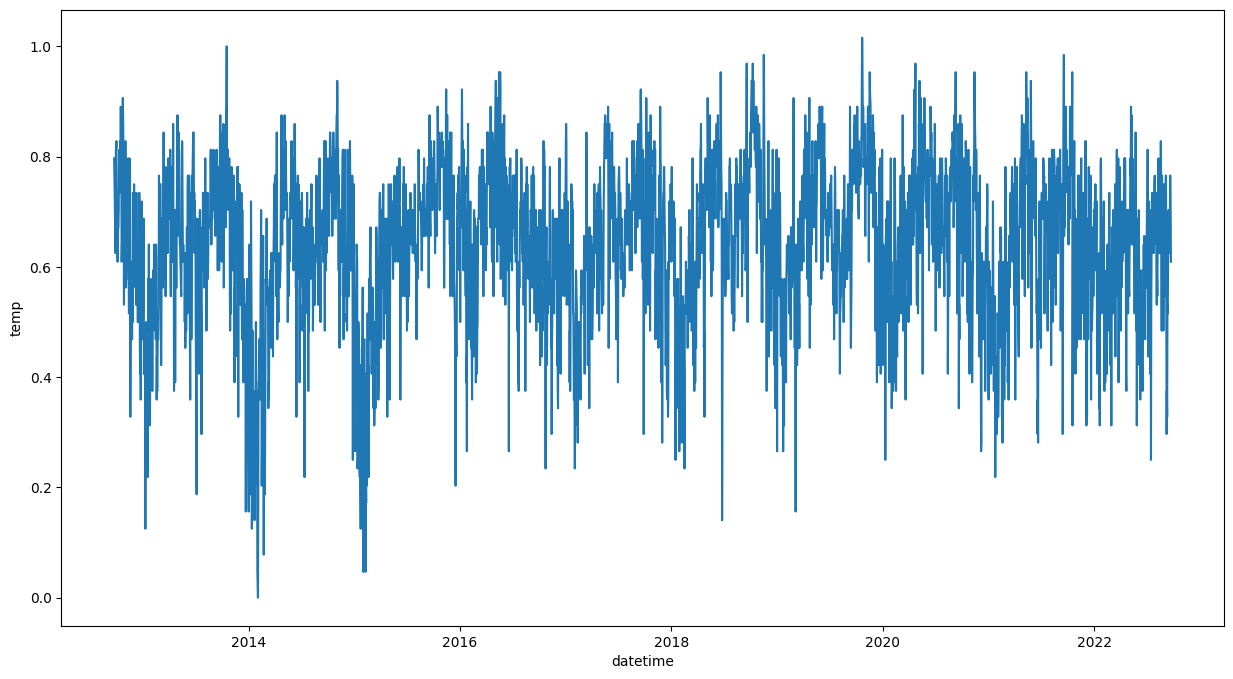

In [ ]:
plt.figure(figsize=(15,8))
sns.lineplot(data = df,x = 'datetime',y = 'temp')

## Windowing

Dataset dilakukan windowing dengan lebar window sebesar 365 (1 tahun).

In [ ]:
window_global = 365

In [ ]:
def df_to_X_y(df,window_size=window_global):
    df_as_np = df.to_numpy()
    X = []
    y = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size]
        y.append(label)
    return np.array(X), np.array(y)

In [ ]:
X,y = df_to_X_y(df)
X.shape, y.shape

((3288, 365, 1), (3288, 1))

In [ ]:

# train 40% val 40% test 20%
X_train, y_train = X[:(int(df.shape[0]*0.4))], y[:(int(df.shape[0]*0.4))]
X_val, y_val     = X[(int(df.shape[0]*0.4)):(int(df.shape[0]*0.8))], y[(int(df.shape[0]*0.4)):(int(df.shape[0]*0.8))]
X_test,y_test    = X[(int(df.shape[0]*0.8)):], y[(int(df.shape[0]*0.8)):]

# Modelling

Model LSTM dibuat dengan 1 layer yang memiliki 10 unit. Loss function yang digunakan adalah MSE dan metrik yang digunakan adalah RMSE dengan epoch sebanyak 100 kali.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM,Dense,Dropout,Input
from tensorflow.keras import Sequential

model = Sequential()
model.add(InputLayer(input_shape = (window_global,1)))
model.add(LSTM(10))
model.add(Dense(1))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 10)                480       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 491
Trainable params: 491
Non-trainable params: 0
_________________________________________________________________


In [ ]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [ ]:
model.compile(loss = MeanSquaredError(), optimizer=Adam(learning_rate = 0.01), metrics=[RootMeanSquaredError()])

In [ ]:
history = model.fit(X_train, y_train,validation_data=(X_val,y_val), epochs=100, shuffle = False)

Epoch 1/100
46/46 [==============================] - 16s 270ms/step - loss: 0.0203 - root_mean_squared_error: 0.1423 - val_loss: 0.0129 - val_root_mean_squared_error: 0.1134
Epoch 2/100
46/46 [==============================] - 12s 257ms/step - loss: 0.0123 - root_mean_squared_error: 0.1110 - val_loss: 0.0125 - val_root_mean_squared_error: 0.1116
Epoch 3/100
46/46 [==============================] - 12s 259ms/step - loss: 0.0120 - root_mean_squared_error: 0.1097 - val_loss: 0.0120 - val_root_mean_squared_error: 0.1094
Epoch 4/100
46/46 [==============================] - 12s 257ms/step - loss: 0.0119 - root_mean_squared_error: 0.1089 - val_loss: 0.0117 - val_root_mean_squared_error: 0.1082
Epoch 5/100
46/46 [==============================] - 11s 244ms/step - loss: 0.0116 - root_mean_squared_error: 0.1078 - val_loss: 0.0115 - val_root_mean_squared_error: 0.1074
Epoch 6/100
46/46 [==============================] - 12s 258ms/step - loss: 0.0114 - root_mean_squared_error: 0.1070 - val_loss: 0

Epoch 48/100
46/46 [==============================] - 12s 259ms/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1043
Epoch 49/100
46/46 [==============================] - 12s 261ms/step - loss: 0.0104 - root_mean_squared_error: 0.1020 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1043
Epoch 50/100
46/46 [==============================] - 12s 262ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1043
Epoch 51/100
46/46 [==============================] - 11s 232ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1042
Epoch 52/100
46/46 [==============================] - 12s 260ms/step - loss: 0.0104 - root_mean_squared_error: 0.1019 - val_loss: 0.0109 - val_root_mean_squared_error: 0.1042
Epoch 53/100
46/46 [==============================] - 12s 262ms/step - loss: 0.0104 - root_mean_squared_error: 0.1018 - val_l

Epoch 95/100
46/46 [==============================] - 12s 260ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 96/100
46/46 [==============================] - 12s 261ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 97/100
46/46 [==============================] - 12s 258ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 98/100
46/46 [==============================] - 12s 261ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 99/100
46/46 [==============================] - 12s 255ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_loss: 0.0107 - val_root_mean_squared_error: 0.1033
Epoch 100/100
46/46 [==============================] - 12s 261ms/step - loss: 0.0102 - root_mean_squared_error: 0.1010 - val_

Berikut merupakan plot dari RMSE data latih dan RMSE data validasi.

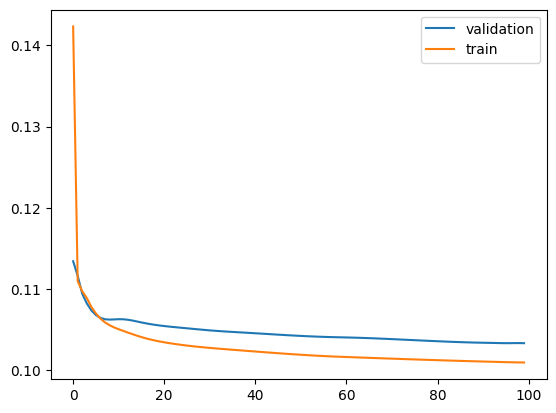

In [ ]:
plt.plot(history.history['val_root_mean_squared_error'],label='validation')
plt.plot(history.history['root_mean_squared_error'],label='train')
plt.legend()
plt.show()

Model digunakan untuk memprediksi data uji.

In [ ]:
y_pred = model.predict(X_test)

12/12 [==============================] - 1s 43ms/step


In [ ]:
y_pred

array([[0.7720149 ],
       [0.79977965],
       [0.80307555],
       [0.8221576 ],
       [0.76707375],
       [0.79101264],
       [0.7787323 ],
       [0.7755158 ],
       [0.75408244],
       [0.7554416 ],
       [0.768283  ],
       [0.760293  ],
       [0.71142316],
       [0.77696323],
       [0.72516537],
       [0.76904255],
       [0.7251356 ],
       [0.83192   ],
       [0.81132674],
       [0.76727355],
       [0.8245698 ],
       [0.82350886],
       [0.79074335],
       [0.7878965 ],
       [0.79366326],
       [0.8622242 ],
       [0.5958156 ],
       [0.64863276],
       [0.734373  ],
       [0.716438  ],
       [0.7625639 ],
       [0.7585469 ],
       [0.79397726],
       [0.71943706],
       [0.7329591 ],
       [0.66706574],
       [0.58606553],
       [0.70360947],
       [0.70267487],
       [0.66822225],
       [0.58728814],
       [0.5801673 ],
       [0.6282558 ],
       [0.629388  ],
       [0.5944301 ],
       [0.7381159 ],
       [0.5658152 ],
       [0.688

Hasil prediksi kemudian diubah menjadi hasil prediksi suhu sebenarnya.

In [ ]:
y_pred = mms.inverse_transform(y_pred)

In [ ]:
y_pred

array([[27.940897],
       [28.118591],
       [28.139685],
       [28.26181 ],
       [27.909271],
       [28.06248 ],
       [27.983887],
       [27.963299],
       [27.82613 ],
       [27.834827],
       [27.917011],
       [27.865875],
       [27.553106],
       [27.972565],
       [27.641058],
       [27.921871],
       [27.64087 ],
       [28.32429 ],
       [28.192493],
       [27.91055 ],
       [28.277246],
       [28.270456],
       [28.060757],
       [28.042538],
       [28.079443],
       [28.518234],
       [26.813221],
       [27.15125 ],
       [27.699987],
       [27.585201],
       [27.880407],
       [27.8547  ],
       [28.081455],
       [27.604397],
       [27.690939],
       [27.26922 ],
       [26.750818],
       [27.503101],
       [27.49712 ],
       [27.276623],
       [26.758642],
       [26.71307 ],
       [27.020838],
       [27.028082],
       [26.804352],
       [27.723942],
       [26.621216],
       [27.408825],
       [27.672323],
       [27.168894],


In [ ]:
Y_inversed = mms.inverse_transform(y_test)

Berikut adalah skor R2 dan MSE dari hasil peramalan.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

print(r2_score(Y_inversed, y_pred))
print(mean_squared_error(Y_inversed, y_pred))

0.19797367397624477
0.5386254957532352


<AxesSubplot:>

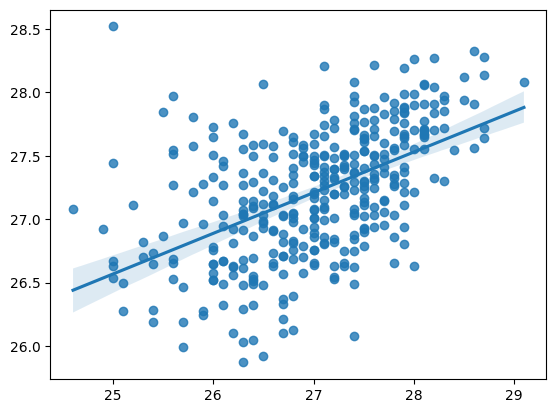

In [ ]:
sns.regplot(Y_inversed, y_pred)

In [ ]:
df['temp'] = mms.inverse_transform(df)

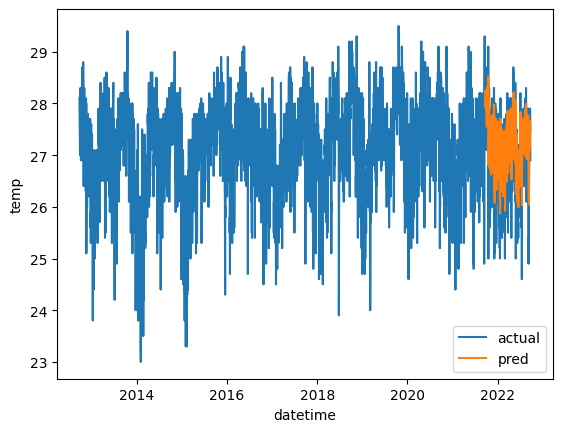

In [ ]:
sns.lineplot(data = df, x = 'datetime',y = 'temp', label = 'actual')
plt.plot(df.index[(int(df.shape[0]*0.8))+window_global:], y_pred.flatten().tolist(), label = 'pred')
plt.legend()
plt.show()

In [ ]:
def df_to_X(df,window_size=window_global):
    df_as_np = df.to_numpy()
    X = []
    for i in range(len(df_as_np)-window_size):
        row = [a for a in df_as_np[i:i+window_size]]
        X.append(row)
        #label = df_as_np[i+window_size]
        #y.append(label)
    return np.array(X)

In [ ]:
Xnew = mms.transform(df)

In [ ]:
Xnew = df_to_X(pd.Series(Xnew.flatten()))
Xnew

array([[0.796875, 0.765625, 0.734375, ..., 0.78125 , 0.59375 , 0.6875  ],
       [0.765625, 0.734375, 0.6875  , ..., 0.59375 , 0.6875  , 0.8125  ],
       [0.734375, 0.6875  , 0.671875, ..., 0.6875  , 0.8125  , 0.859375],
       ...,
       [0.671875, 0.796875, 0.859375, ..., 0.65625 , 0.625   , 0.765625],
       [0.796875, 0.859375, 0.859375, ..., 0.625   , 0.765625, 0.765625],
       [0.859375, 0.859375, 0.890625, ..., 0.765625, 0.765625, 0.703125]])

In [ ]:
Xnewnew = Xnew[-1].reshape((1,window_global,1))
Xnewnew

array([[[0.859375],
        [0.859375],
        [0.890625],
        [0.78125 ],
        [0.8125  ],
        [0.796875],
        [0.78125 ],
        [0.734375],
        [0.734375],
        [0.765625],
        [0.75    ],
        [0.640625],
        [0.78125 ],
        [0.6875  ],
        [0.765625],
        [0.6875  ],
        [0.890625],
        [0.875   ],
        [0.765625],
        [0.875   ],
        [0.890625],
        [0.8125  ],
        [0.796875],
        [0.8125  ],
        [0.953125],
        [0.3125  ],
        [0.5     ],
        [0.734375],
        [0.6875  ],
        [0.765625],
        [0.765625],
        [0.828125],
        [0.6875  ],
        [0.703125],
        [0.578125],
        [0.40625 ],
        [0.6875  ],
        [0.6875  ],
        [0.609375],
        [0.453125],
        [0.46875 ],
        [0.578125],
        [0.578125],
        [0.515625],
        [0.765625],
        [0.46875 ],
        [0.6875  ],
        [0.765625],
        [0.625   ],
        [0.625   ],


In [ ]:
hasil = model.predict(Xnewnew)
hasil.shape

1/1 [==============================] - 0s 63ms/step


(1, 1)

In [ ]:
hasil

array([[0.6959466]], dtype=float32)

In [ ]:
def peramalan(x,modelan,window,forecasting=1):
    xx = x.flatten().tolist()
    for i in range(forecasting):
        print(window + i)
        x_feat = np.reshape(xx[i :window+i],(1,window,1))
        print(x_feat.flatten().tolist())
        xx.append(modelan.predict(x_feat).flatten().tolist()[0])
    xx = xx[window:]
    return(xx)

forecasting_result = peramalan(Xnew,model,window_global,1)

365
[0.7968750000000004, 0.7656250000000004, 0.7343750000000004, 0.6875000000000004, 0.6718750000000004, 0.6250000000000004, 0.8125000000000004, 0.8125000000000004, 0.8281250000000004, 0.7187500000000004, 0.7187500000000004, 0.6406250000000004, 0.6093750000000004, 0.6406250000000004, 0.6718750000000004, 0.6718750000000004, 0.7031250000000004, 0.7968750000000004, 0.8125000000000004, 0.7343750000000004, 0.7968750000000004, 0.8281250000000004, 0.7812500000000004, 0.8906250000000004, 0.7968750000000004, 0.7812500000000004, 0.6093750000000004, 0.6406250000000004, 0.6562500000000004, 0.7031250000000004, 0.9062500000000004, 0.8750000000000004, 0.8281250000000004, 0.7500000000000004, 0.5312500000000004, 0.6875000000000004, 0.8125000000000004, 0.6875000000000004, 0.7812500000000004, 0.8281250000000004, 0.7812500000000004, 0.5625000000000004, 0.5781250000000004, 0.5781250000000004, 0.6406250000000004, 0.6718750000000004, 0.7031250000000004, 0.7656250000000004, 0.7968750000000004, 0.6562500000000

In [ ]:
forecasting_result

[0.7656250000000004,
 0.7343750000000004,
 0.6875000000000004,
 0.6718750000000004,
 0.6250000000000004,
 0.8125000000000004,
 0.8125000000000004,
 0.8281250000000004,
 0.7187500000000004,
 0.7187500000000004,
 0.6406250000000004,
 0.6093750000000004,
 0.6406250000000004,
 0.6718750000000004,
 0.6718750000000004,
 0.7031250000000004,
 0.7968750000000004,
 0.8125000000000004,
 0.7343750000000004,
 0.7968750000000004,
 0.8281250000000004,
 0.7812500000000004,
 0.8906250000000004,
 0.7968750000000004,
 0.7812500000000004,
 0.6093750000000004,
 0.6406250000000004,
 0.6562500000000004,
 0.7031250000000004,
 0.9062500000000004,
 0.8750000000000004,
 0.8281250000000004,
 0.7500000000000004,
 0.5312500000000004,
 0.6875000000000004,
 0.8125000000000004,
 0.6875000000000004,
 0.7812500000000004,
 0.8281250000000004,
 0.7812500000000004,
 0.5625000000000004,
 0.5781250000000004,
 0.5781250000000004,
 0.6406250000000004,
 0.6718750000000004,
 0.7031250000000004,
 0.7656250000000004,
 0.7968750000

In [ ]:
result = mms.inverse_transform(np.reshape(forecasting_result, (-1, 1)))

In [ ]:
result

array([[27.9       ],
       [27.7       ],
       [27.4       ],
       ...,
       [27.9       ],
       [27.5       ],
       [27.60602226]])

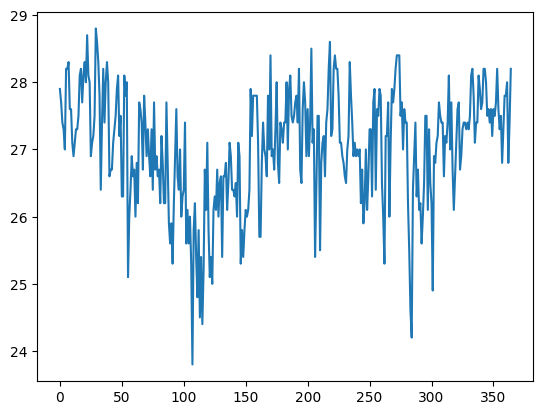

In [ ]:
plt.plot(result[:365])

In [ ]:
pd.DataFrame(result).to_csv('result.csv', index = False)